In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten,Dense
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df = pd.read_csv('D:\Download\LP-IV-datasets (1)\LP-IV-datasets\MNIST(Ass2&3)\mnist_train.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y_train = df['label'].values

In [31]:
x_train = df.drop('label',axis=1).values

In [32]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [33]:
x_train = x_train.astype('float32')/255

In [34]:
df1 = pd.read_csv('D:\Download\LP-IV-datasets (1)\LP-IV-datasets\MNIST(Ass2&3)\mnist_test.csv')
df1

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y_test = df1['label'].values

In [36]:
x_test = df1.drop('label',axis=1).values

In [37]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [38]:
x_test = x_test.astype('float32')/255

In [39]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=11)

Epoch 1/11
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6746 - accuracy: 0.8258 - val_loss: 0.3672 - val_accuracy: 0.8989
Epoch 2/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3468 - accuracy: 0.9020 - val_loss: 0.3013 - val_accuracy: 0.9175
Epoch 3/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2986 - accuracy: 0.9161 - val_loss: 0.2699 - val_accuracy: 0.9254
Epoch 4/11
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2692 - accuracy: 0.9247 - val_loss: 0.2471 - val_accuracy: 0.9319
Epoch 5/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2460 - accuracy: 0.9315 - val_loss: 0.2289 - val_accuracy: 0.9348
Epoch 6/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2273 - accuracy: 0.9360 - val_loss: 0.2132 - val_accuracy: 0.9390
Epoch 7/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2119 - accuracy: 0.9413 - val_loss: 0.2009 - val_ac

In [43]:
loss,acc = model.evaluate(x_test,y_test)
print("accuracy = ",acc)
print("loss = ",loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.1667 - accuracy: 0.9510
accuracy =  0.9509999752044678
loss =  0.1666896939277649


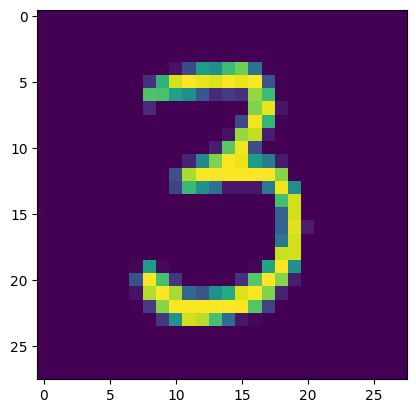

313/313 [==============================] - 3s 8ms/step


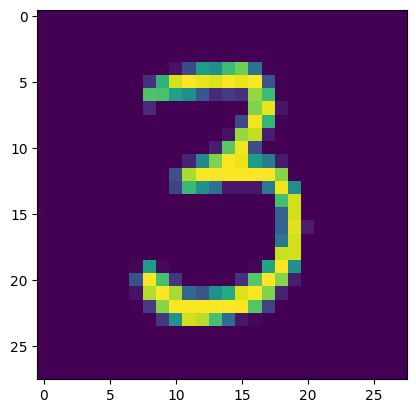

In [44]:
n = 50
plt.imshow(x_train[n])
plt.show()
predict =model.predict(x_test)
plt.imshow(x_train[n])
plt.show()

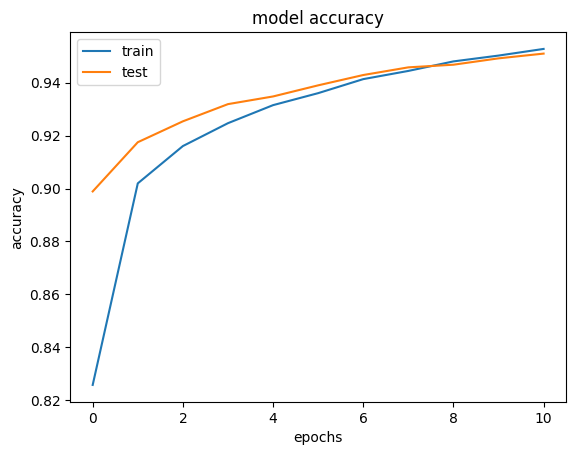

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

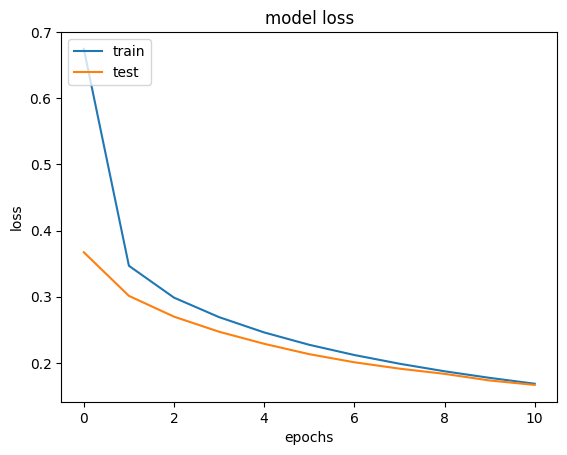

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train','test'],loc = 'upper left')
plt.show()